In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraywavetrace import beam, optics, beamline2d

Can't find epics package. PPM_Imager class will not be supported


In [2]:
N = 512
FOV = 10e-3
dx = FOV/N

E0 = 9500.

beam_params = {
    'photonEnergy': E0,
    'cx': 0e-6,
    'cy': 0e-6,
    'ax': 0.e-6,
    'ay': 0e-6,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z_source': 650,
    'rangeFactor': 10
}

In [3]:
beam_params['photonEnergy'] = 9500

b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

# Stack of 20 CRLs for tight focus
crl_list = []
for i in range(10):
    crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6))

IP = optics.PPM('IP', FOV=4e-6, z=800.673, N=256)

upstream_YAG = optics.PPM('YAG1',FOV=2e-3,z=800.02 + 1e-3, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803)


devices = [mr1l0,mr2l0, IP,upstream_YAG]
devices = devices + crl_list

XPP = beamline2d.Beamline(devices)

[<Axes: title={'center': 'IP'}, xlabel='X coordinates (microns)', ylabel='Y coordinates (microns)'>,
 <Axes: >,
 <Axes: >]

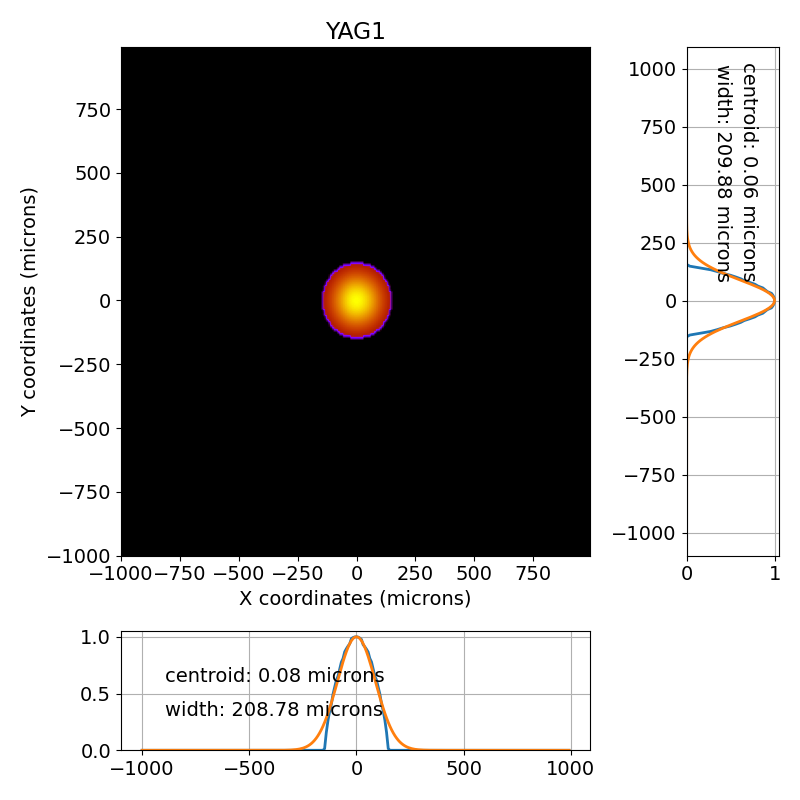

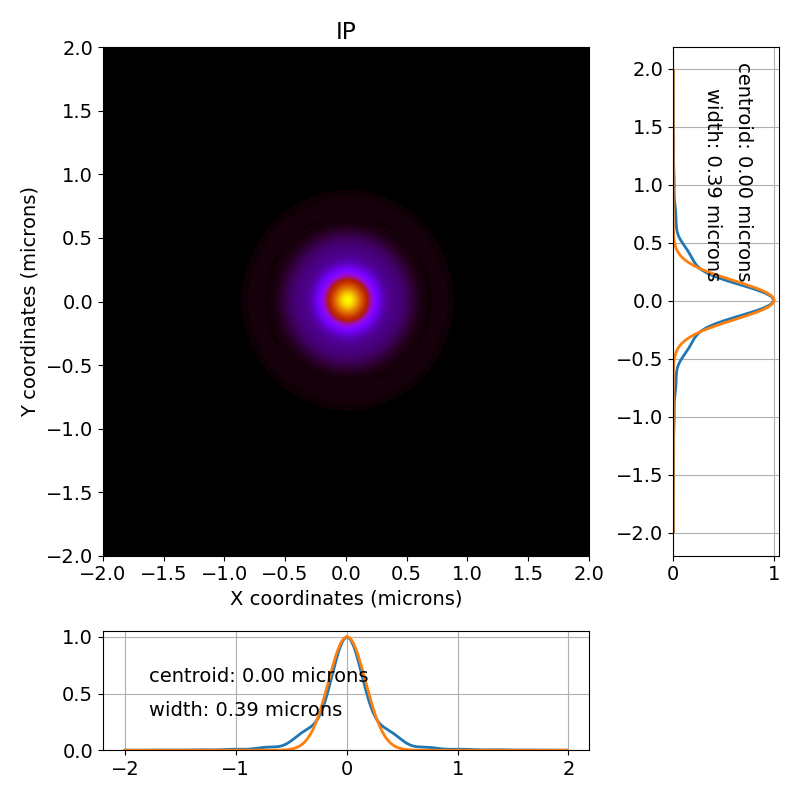

In [4]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.IP.view_beam()
# XPP.YAG.view_beam()

In [5]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=.05, time_window=.5)

In [6]:
pulse_test.N

22

In [7]:
%%capture capt
pulse_test.propagate(beamline=XPP, screen_names=['IP','YAG1'])

Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported


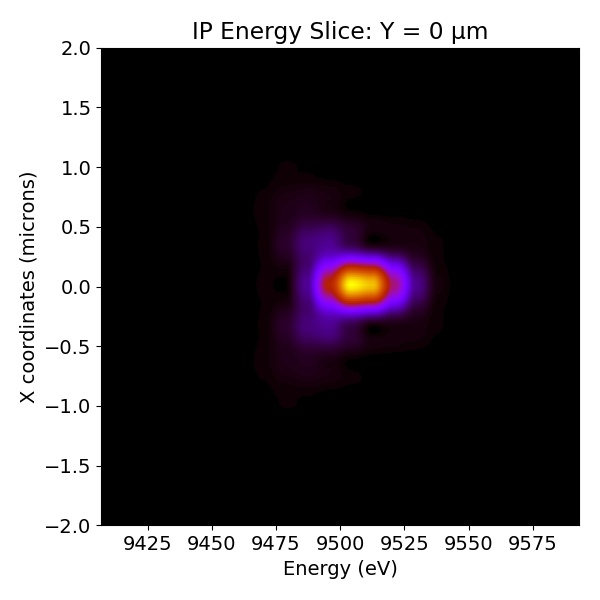

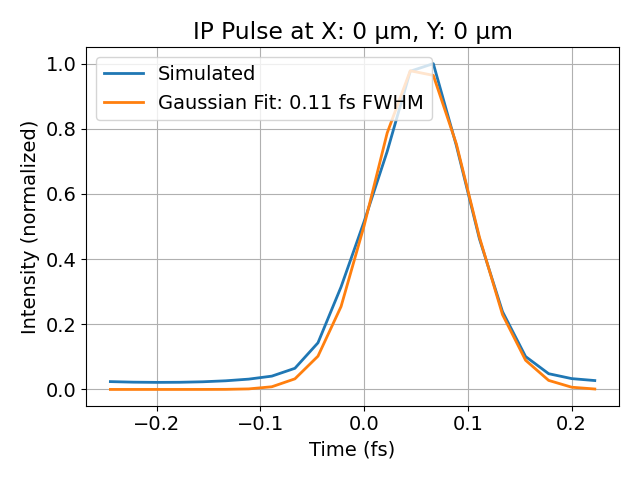

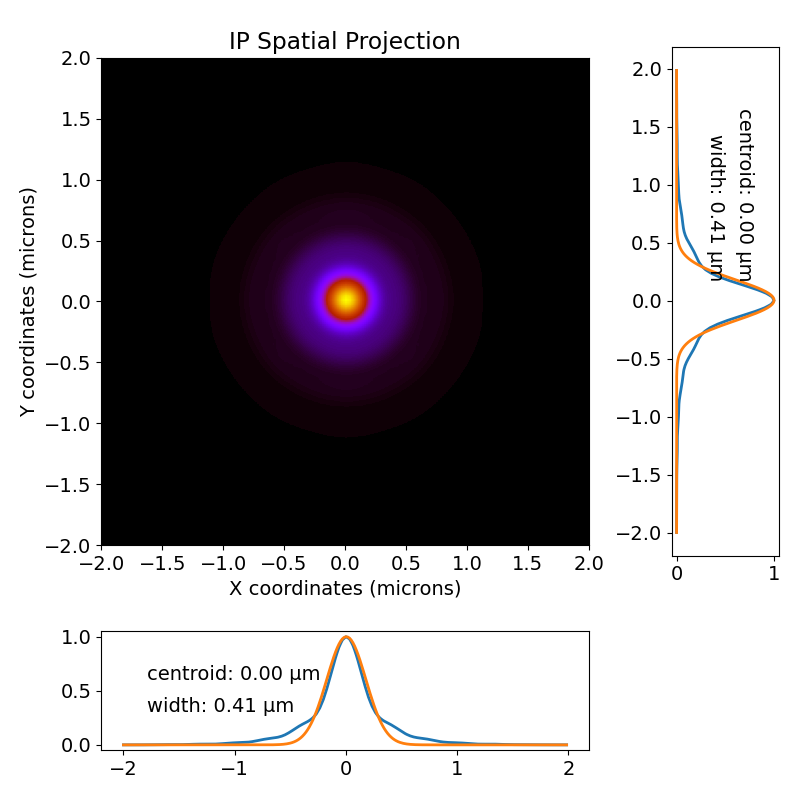

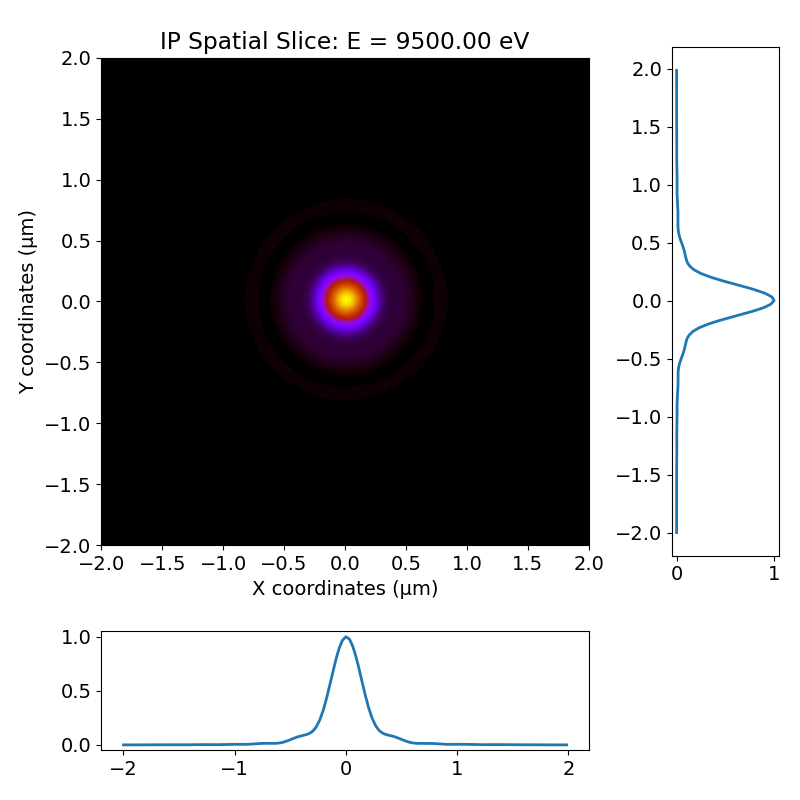

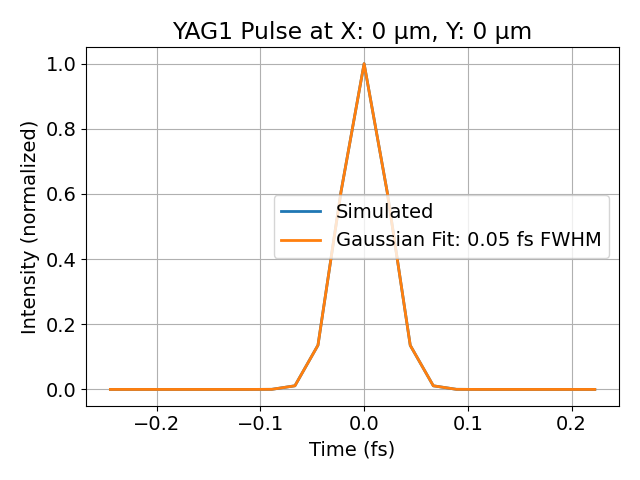

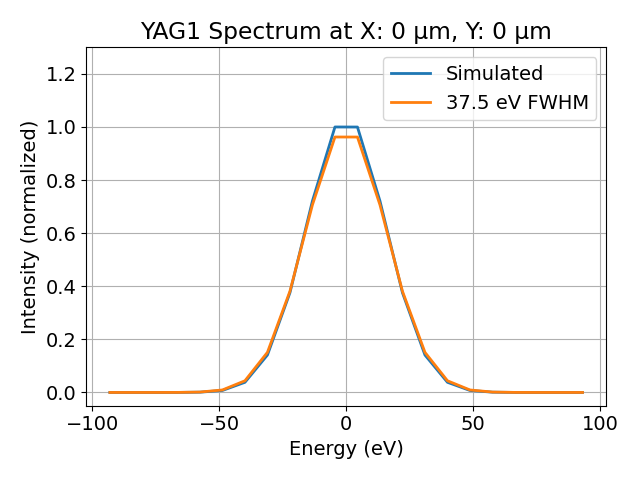

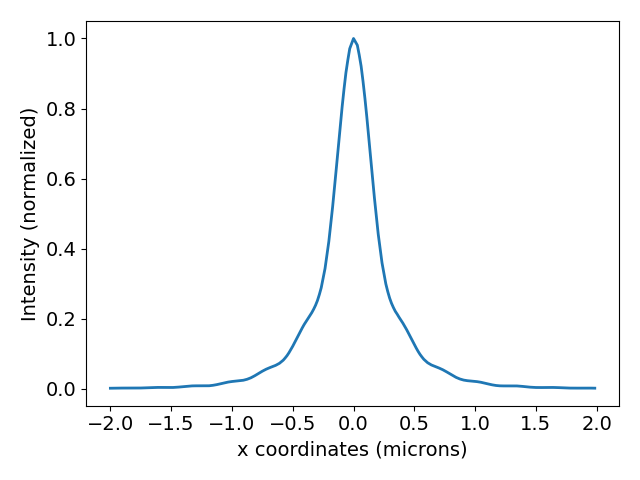

In [8]:
# figure_path = '/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Commissioning/SXR beam delivery/time_domain_figures/'

pulse_test.imshow_energy_slice('IP')
# plt.savefig(figure_path+'CRL_energy_slice.png')
pulse_test.plot_pulse('IP')
pulse_test.imshow_projection('IP')
# plt.savefig(figure_path+'CRL_integrated.png')
pulse_test.imshow_spatial_slice('IP',slice_pos=9500)
# plt.savefig(figure_path+'CRL_spatial_slice.png')
pulse_test.plot_pulse('YAG1')
pulse_test.plot_spectrum('YAG1')
proj = pulse_test.plot_1d_projection('IP')
# plt.savefig(figure_path+'CRL_spectrum.png')